Goal of this Analysis : To check if we can  get better  classification results for APS failure with dimensionality reduction techniques such as PCA.

https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [3]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve , precision_recall_curve, f1_score, average_precision_score
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV, KFold


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.feature_selection import RFE

In [5]:
import graphviz 
import sklearn.tree as tree

In [6]:
## Read in the train data sets 
train_data_1 = pd.read_csv("train_data_1.csv")


In [7]:
## Read in the test data sets 
test_data_1 = pd.read_csv("test_data_1.csv")

In [8]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   60000 non-null  object 
 1   ag_003  60000 non-null  float64
 2   ag_004  60000 non-null  float64
 3   ag_005  60000 non-null  float64
 4   ag_006  60000 non-null  float64
 5   ag_007  60000 non-null  float64
 6   ah_000  60000 non-null  float64
 7   al_000  60000 non-null  float64
 8   ap_000  60000 non-null  float64
 9   ay_001  60000 non-null  float64
 10  ay_005  60000 non-null  float64
 11  ay_006  60000 non-null  float64
 12  ay_007  60000 non-null  float64
 13  ay_008  60000 non-null  float64
 14  az_003  60000 non-null  float64
 15  az_004  60000 non-null  float64
 16  az_005  60000 non-null  float64
 17  az_006  60000 non-null  float64
 18  ba_000  60000 non-null  float64
 19  ba_006  60000 non-null  float64
 20  ba_007  60000 non-null  float64
 21  cj_000  60000 non-null  float64
 22

In [9]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22

In [49]:
def perform_classification(model , X_train,X_test,y_train,y_test, classifier):
    
    model = model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix with the predicted class  :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    if classifier == 'dt':
            print("\n Max depth:{} ".format(model.tree_.max_depth))
        
    
    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.scatter(fpr[ix1], tpr[ix1], marker='o', color='black', label='Best')
    plt.show()
    
    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    ####
    # convert to f score
    #fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest recall 
    #ix = np.argmax(recall)
    #best_threshold = pr_thresholds[ix]
    #print('Best Threshold for PR curve =%f, Recall=%.3f' % (pr_thresholds[ix], recall[ix]))
    ####
    
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    def cal_opt_class(val, threshold):
        return (val >= threshold).astype('int')
    
    #opt_class = pd.Series(preds).apply(lambda x: cal_opt_class(x,best_threshold))
    
    #print("Confusion matrix with opt threshold:\n{}".format(confusion_matrix(y_test,opt_class)))
    
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # define thresholds
    #thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    #scores = [f1_score(y_test, to_labels(preds, t)) for t in thresholds]
    # get best threshold
    #ix = np.argmax(scores)
    #print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    #p_class = to_labels(preds , thresholds[ix])
    #print("Confusion matrix with opt threshold search :\n{}".format(confusion_matrix(y_test,p_class)))
    
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : y_test , "pred_class" : test_pred})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]
    
    total_cost = fp*10 + fn*500
    
    print("Total_cost of mis- classification : {}".format(total_cost))
    
    ## Plot Variable importance for decision tree , random forest
    if (classifier == 'dt') | (classifier == 'rf') | (classifier == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,5))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)


In [10]:
cols = train_data_1.columns.tolist()
cont_features = cols[1:]

In [11]:
train_data_1['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [12]:
def make_numeric(val):
    if val == 'neg':
        return 0
    else:
        return 1
train_data_1['label'] = train_data_1['class'].apply(lambda x: make_numeric(x))

In [13]:
train_data_1['label'].value_counts()

0    59000
1     1000
Name: label, dtype: int64

In [14]:
test_data_1['label'] = test_data_1['class'].apply(lambda x: make_numeric(x))

In [15]:
test_data_1['label'].value_counts()

0    15625
1      375
Name: label, dtype: int64

In [16]:
def feature_selection(model, data , cont_features):
    """
    for the given model , data and features, select the best features with RFE.
    """
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[cont_features] = scaler.fit_transform(data1[cont_features])
    ##
    predictors = data1[cont_features]
    ##
    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_validate : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_validate : {}".format(y_validate.shape))
    ##
    rfe = RFE(model, n_features_to_select = 10)
    fit = rfe.fit(X_train, y_train)
    # report selected features
    names = X_train.columns
    print('Selected Features:\n')
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ##
    # plot feature rank

    ticks = [i for i in range(len(names))]
    selected_ranking = []
    selected_ticks = []
    ranking = list(fit.ranking_)
    for i in range(len(names)):
        if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
            selected_ranking.append(ranking[i])
            selected_ticks.append(list(names)[i])
        
    plt.figure(figsize = (15,5))
    plt.bar(selected_ticks, selected_ranking)
    plt.xticks(selected_ticks, rotation = 90)
    plt.ylabel("Rankings")
    plt.title("First 3 ranks")
    plt.show()
    
    return

In [17]:
def parameter_tuning(model, param_grid, data , n_features):
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_test : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_test : {}".format(y_validate.shape))

    cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 12)
    
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    #
    print(grid_search.best_params_)
    #
    model_best = grid_search.best_estimator_
    model_predictions = model_best.predict(X_validate)
    #
    print("Test set score using predicted labels: {:.2f}".format(np.mean(model_predictions == y_validate)))

    print("Calculated Test set score: {:.2f}".format(model_best.score(X_validate,y_validate)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_validate,model_predictions)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_validate,model_predictions)))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model_best.predict_proba(X_validate)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_validate, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    ##Calculate AUC and plot precision recall curve.
    precision, recall, thresholds = precision_recall_curve(y_validate, preds)
    pr_auc = auc(recall, precision)
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    return
    

In [19]:
def cross_validation(model, data , n_features ):
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 33)
    ## scale the continous variables.
    #scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    #data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    scores = cross_val_score(model , predictors , data1['label'], cv = cv,scoring = 'f1' )
    print(scores)
    print("\n Avg AUC score for PR curve:{}".format(scores.mean()))

    ## predict class
    pred_class = cross_val_predict(model, predictors , data1['label'], cv = cv )

    ##predict probability values
    predicted = cross_val_predict(model, predictors, data1['label'], cv = cv, method = 'predict_proba' )
    print("Confusion matrix :\n{}".format(confusion_matrix(data1['label'],pred_class)))

    ##calculate roc auc
    fpr, tpr, thresholds = roc_curve(data1['label'], predicted[:,1])
    roc_auc = auc(fpr, tpr)
    ##

    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(data1['label'], predicted[:,1])
    pr_auc = auc(recall, precision)
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : data1['label'] , "pred_class" : pred_class})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]    
    total_cost = fp*10 + fn*500    
    print("Total_cost of mis- classification : {}".format(total_cost))

    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

    return

##### PCA compoments = 10 and Logistic Regression

[0.18233083 0.17268722 0.17090272 0.17125111 0.18515038]

 Avg AUC score for PR curve:0.17646445074628342
Confusion matrix :
[[49912  9088]
 [   25   975]]
Total_cost of mis- classification : 103380


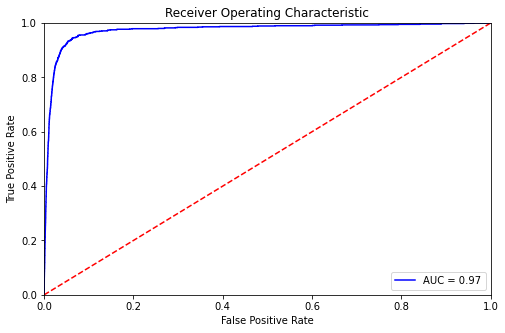

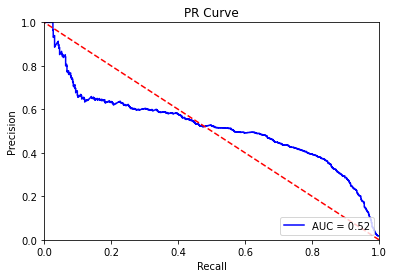

In [51]:
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression(class_weight = 'balanced', solver = 'liblinear'))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

[0.18139317 0.18164968 0.17259786 0.16908851 0.17939282]

 Avg AUC score for PR curve:0.17682440926547288
Confusion matrix :
[[49981  9019]
 [   29   971]]
Total_cost of mis- classification : 104690


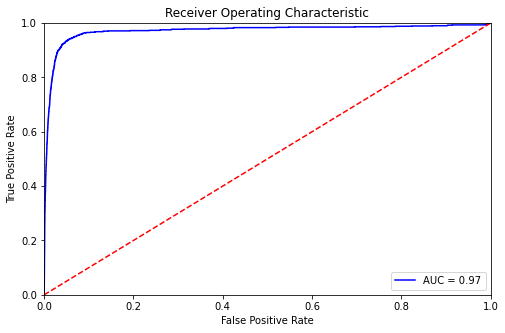

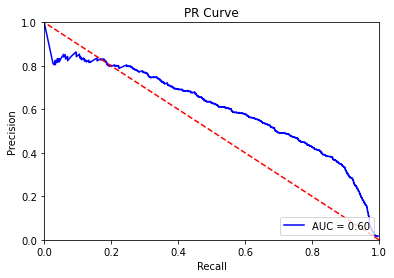

In [30]:
# define the pipeline
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression(class_weight = 'balanced', solver = 'liblinear'))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

PCA and Decision Trees Classifier:

[0.57142857 0.52820513 0.49148418 0.46943765 0.50753769]

 Avg AUC score for PR curve:0.5136186451604977
Confusion matrix :
[[58522   478]
 [  487   513]]
Total_cost of mis- classification : 248280


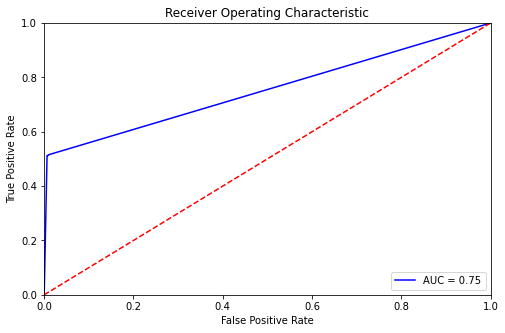

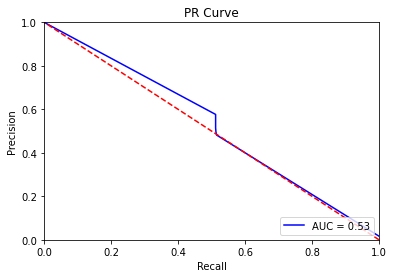

In [29]:
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('dt', DecisionTreeClassifier(random_state = 12 , class_weight = 'balanced'))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

[0.65258516 0.09882334 0.06225751 0.0512049  0.0335814  0.02090544
 0.01348654 0.01111185 0.01012305 0.00675671]


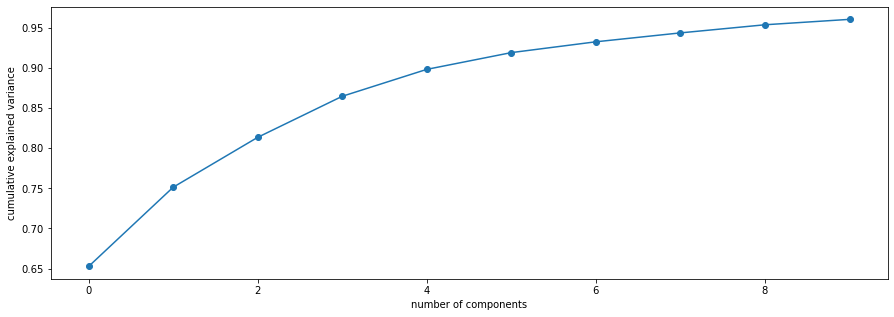

In [53]:
## PCA with 10 components
pca = PCA(n_components = 10)
predictors = train_data_1[cont_features]
pca.fit(predictors)
print(pca.explained_variance_ratio_)
##
plt.figure(figsize = (15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

PCA components :2
[0.15729421 0.16377171 0.15780867 0.15767974 0.16574586]

 Avg AUC score for PR curve:0.16046003756303967
Confusion matrix :
[[48853 10147]
 [   28   972]]
Total_cost of mis- classification : 115470


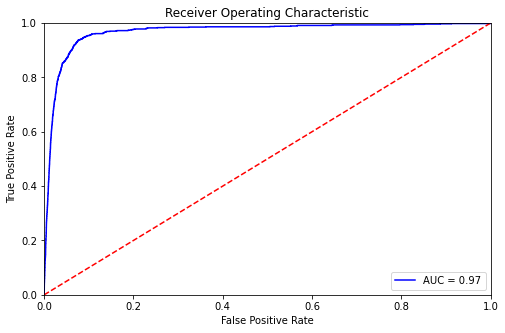

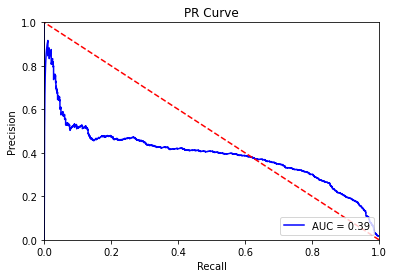

PCA components :3
[0.15914684 0.16624685 0.16112957 0.15847217 0.16923077]

 Avg AUC score for PR curve:0.1628452392364481
Confusion matrix :
[[48950 10050]
 [   21   979]]
Total_cost of mis- classification : 111000


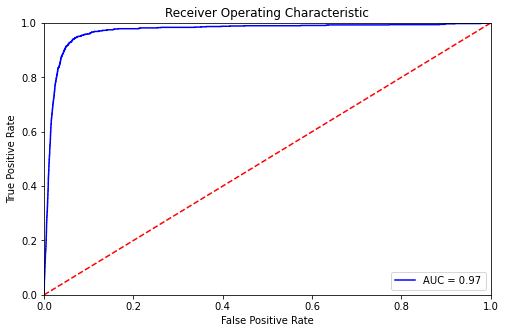

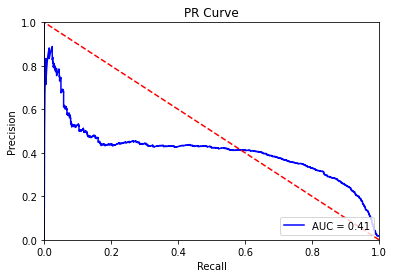

PCA components :4
[0.1513851  0.14630524 0.1480351  0.14786873 0.1584    ]

 Avg AUC score for PR curve:0.15039883225513068
Confusion matrix :
[[47951 11049]
 [   21   979]]
Total_cost of mis- classification : 120990


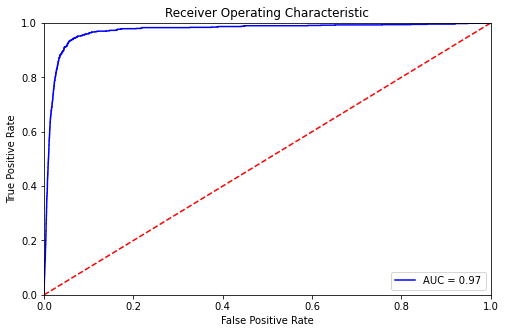

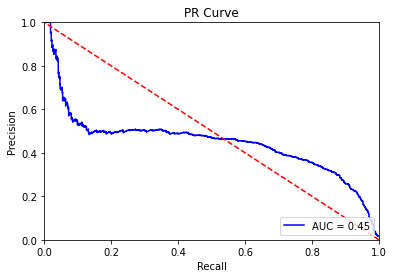

PCA components :10
[0.18233083 0.17268722 0.17090272 0.17125111 0.18515038]

 Avg AUC score for PR curve:0.17646445074628342
Confusion matrix :
[[49913  9087]
 [   25   975]]
Total_cost of mis- classification : 103370


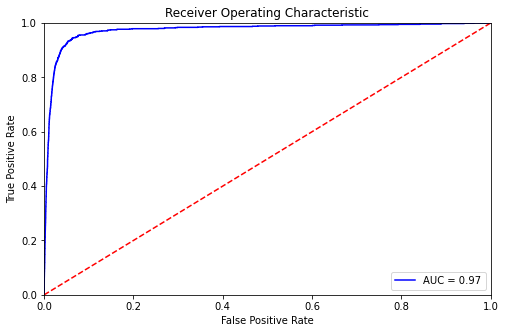

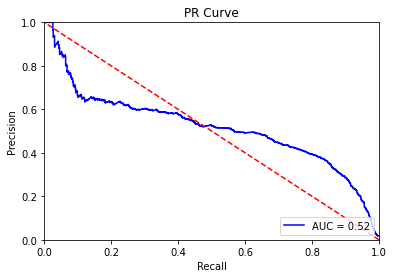

In [61]:
# define the pipeline
for n in [2,3,4,10]:
    print("PCA components :{}".format(n))
    steps = [('pca', PCA(n_components=n)), ('lg', LogisticRegression(random_state = 12 , class_weight = 'balanced', solver = 'liblinear'))]
    model = Pipeline(steps=steps)
    ##
    n_features = cont_features
    cross_validation(model=model, data= train_data_1 , n_features= n_features )
    

PCA components :2
[0.43005181 0.42519685 0.35096154 0.39461883 0.37659033]

 Avg AUC score for PR curve:0.3954838734392526
Confusion matrix :
[[58377   623]
 [  601   399]]
Total_cost of mis- classification : 306730


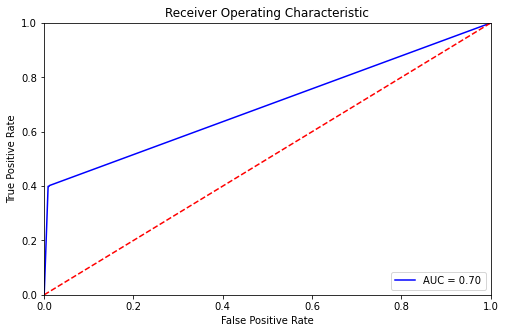

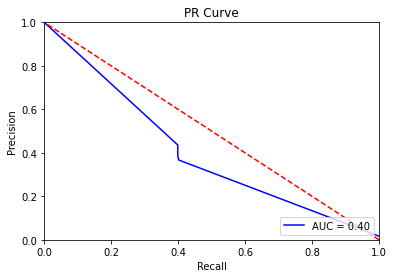

PCA components :3
[0.45360825 0.44327177 0.42512077 0.42990654 0.40609137]

 Avg AUC score for PR curve:0.4315997401588034
Confusion matrix :
[[58429   571]
 [  568   432]]
Total_cost of mis- classification : 289710


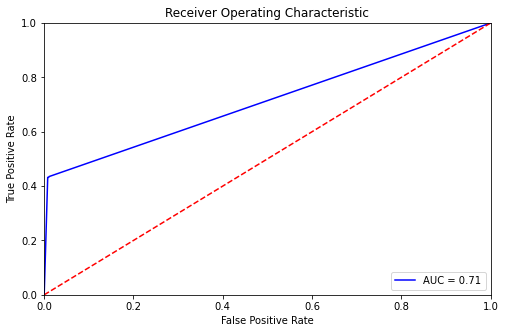

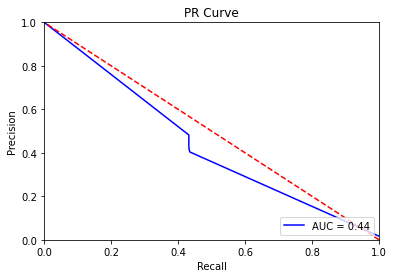

PCA components :4
[0.50652742 0.44324324 0.38024691 0.39058824 0.43583535]

 Avg AUC score for PR curve:0.43128823167015995
Confusion matrix :
[[58433   567]
 [  571   429]]
Total_cost of mis- classification : 291170


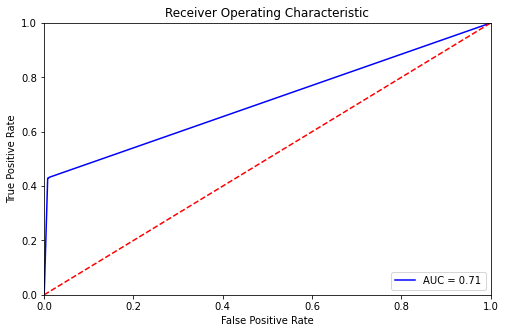

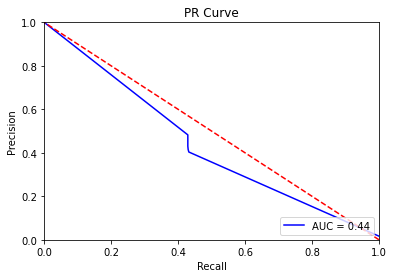

PCA components :10
[0.57142857 0.52820513 0.48456057 0.47201946 0.52      ]

 Avg AUC score for PR curve:0.5152427468850307
Confusion matrix :
[[58521   479]
 [  488   512]]
Total_cost of mis- classification : 248790


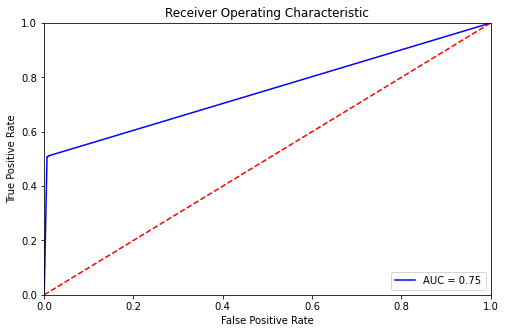

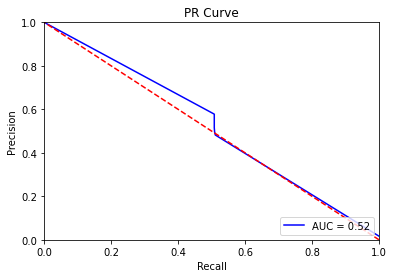

In [60]:
# define the pipeline
for n in [2,3,4,10]:
    print("PCA components :{}".format(n))
    steps = [('pca', PCA(n_components=n)), ('dt', DecisionTreeClassifier(random_state = 12 , class_weight = 'balanced'))]
    model = Pipeline(steps=steps)
    ##
    n_features = cont_features
    cross_validation(model=model, data= train_data_1 , n_features= n_features )
    

PCA components :2
[0.46349206 0.46254072 0.34985423 0.42461538 0.37058824]

 Avg AUC score for PR curve:0.41421812548383824
Confusion matrix :
[[58706   294]
 [  664   336]]
Total_cost of mis- classification : 334940


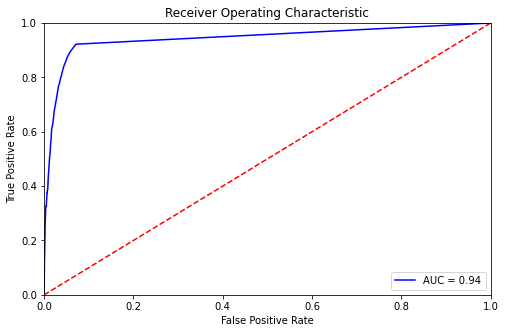

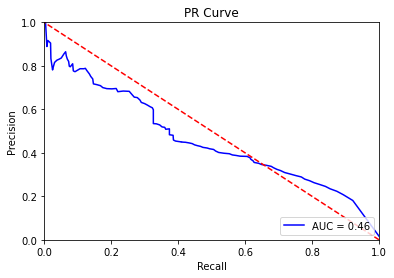

PCA components :3
[0.50491803 0.46864686 0.39116719 0.45098039 0.44897959]

 Avg AUC score for PR curve:0.4529384147791947
Confusion matrix :
[[58781   219]
 [  645   355]]
Total_cost of mis- classification : 324690


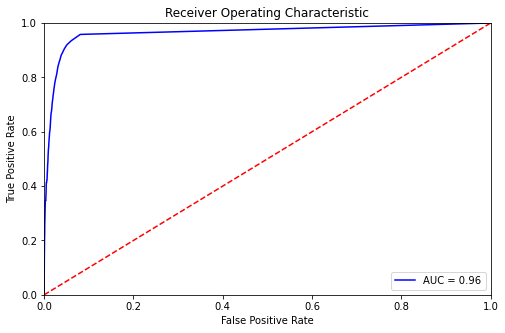

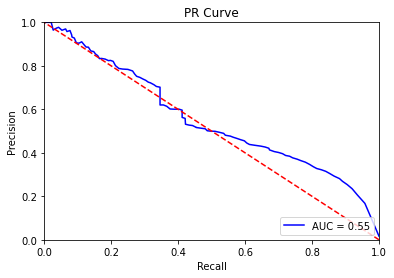

PCA components :4
[0.52597403 0.4717608  0.41717791 0.47249191 0.54711246]

 Avg AUC score for PR curve:0.4869034217635681
Confusion matrix :
[[58784   216]
 [  619   381]]
Total_cost of mis- classification : 311660


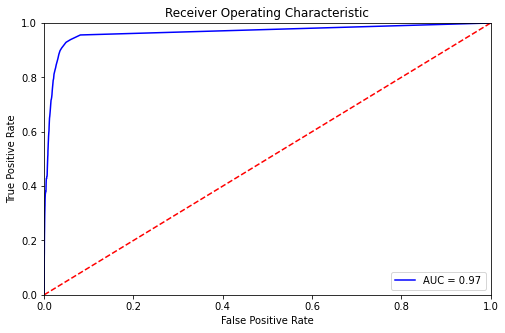

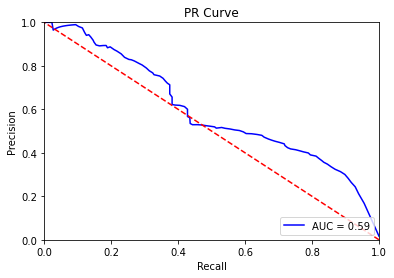

PCA components :10
[0.63870968 0.60130719 0.6407767  0.61006289 0.53872054]

 Avg AUC score for PR curve:0.6059153995586529
Confusion matrix :
[[58924    76]
 [  528   472]]
Total_cost of mis- classification : 264760


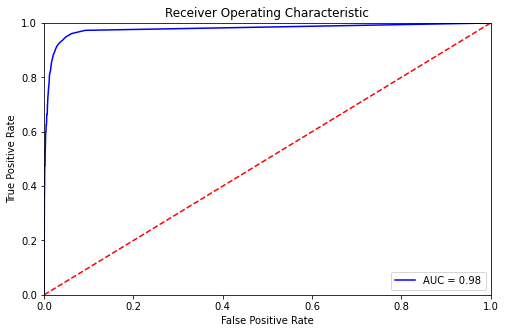

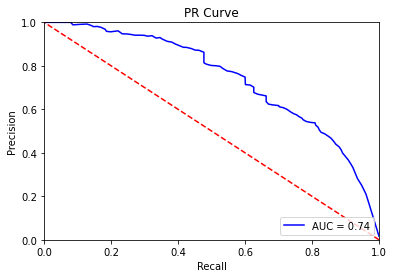

In [59]:
# define the pipeline
for n in [2,3,4,10]:
    print("PCA components :{}".format(n))
    steps = [('pca', PCA(n_components=n)), ('rf', RandomForestClassifier(random_state = 12 , class_weight = 'balanced'))]
    model = Pipeline(steps=steps)
    ##
    n_features = cont_features
    cross_validation(model=model, data= train_data_1 , n_features= n_features )
    

Check PCA + Logistic Regression on Test data:


 X_train : (60000, 32)

 X_test : (16000, 32)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9670416666666667
Train Accuracy using predicted labels :0.9670416666666667
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.973
Confusion matrix with the predicted class  :
[[15224   401]
 [   35   340]]


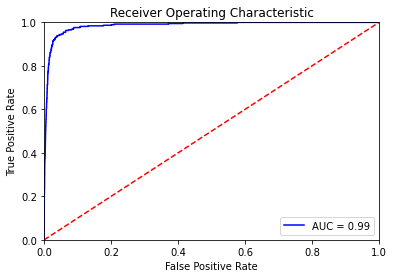

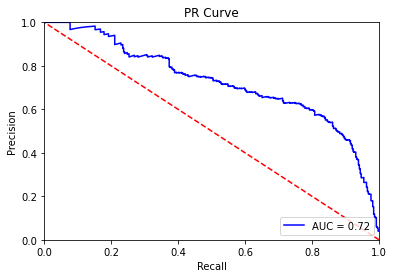

Total_cost of mis- classification : 21510


In [62]:
## Check the performance of the model on test data 
n_features = cont_features 
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression(class_weight = 'balanced', solver = 'liblinear'))]
model = Pipeline(steps=steps)
perform_classification(model , X_train, X_test, y_train, y_test , 'model')


PCA with Logistic Regression gives the least mis-classification cost amongst the classifiers . First 4 components explain 90%  of the variance. Logistic Regression with 10 components gives a cost of 21510.

##### LDA:

[0.50758621 0.52496434 0.53313253 0.53374233 0.53811659]

 Avg AUC score for PR curve:0.527508399379108
Confusion matrix :
[[57488  1512]
 [  101   899]]
Total_cost of mis- classification : 65620


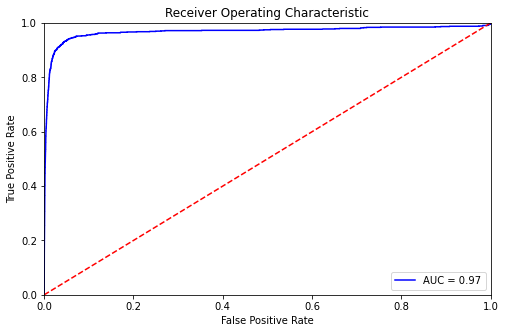

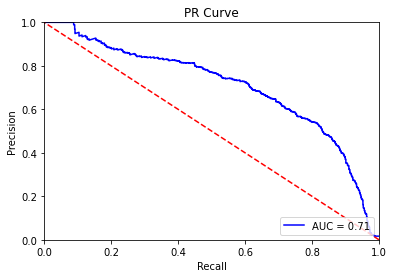

In [34]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression(class_weight = 'balanced', solver = 'liblinear'))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )


 X_train : (48000, 32)

 X_test : (12000, 32)

 y_train : (48000,)

 y_test : (12000,)
{'solver': 'svd'}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11722    78]
 [   70   130]]


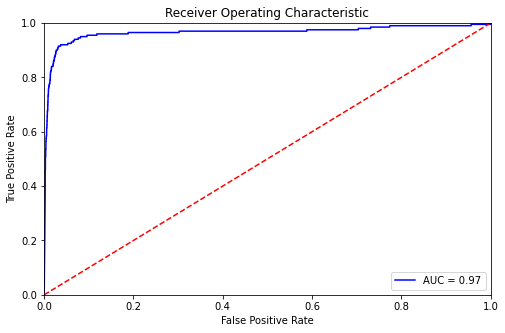

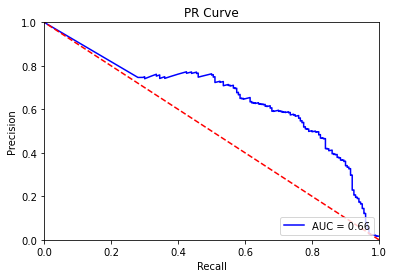

In [41]:
model = LinearDiscriminantAnalysis(n_components=1)
param_grid = {
    "solver" : ['svd', 'lsqr', 'eigen']
    
}
parameter_tuning(model = model, param_grid = param_grid, data = train_data_1 , n_features = cont_features)


 X_train : (48000, 32)

 X_test : (12000, 32)

 y_train : (48000,)

 y_test : (12000,)
{'shrinkage': 0.0}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11722    78]
 [   70   130]]


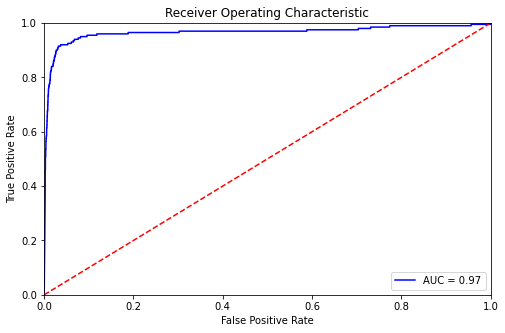

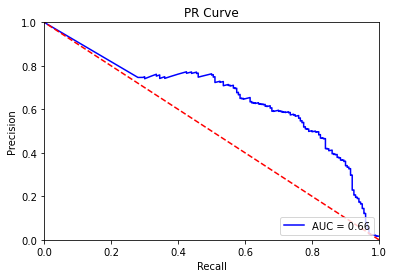

In [43]:
model = LinearDiscriminantAnalysis(n_components=1, solver = 'lsqr')
param_grid = {
   
    "shrinkage" : np.arange(0,1,0.01)
    
}
parameter_tuning(model = model, param_grid = param_grid, data = train_data_1 , n_features = cont_features)

[0.60340633 0.5959596  0.60146699 0.58093126 0.51485149]

 Avg AUC score for PR curve:0.5793231327330608
Confusion matrix :
[[58529   471]
 [  400   600]]
Total_cost of mis- classification : 204710


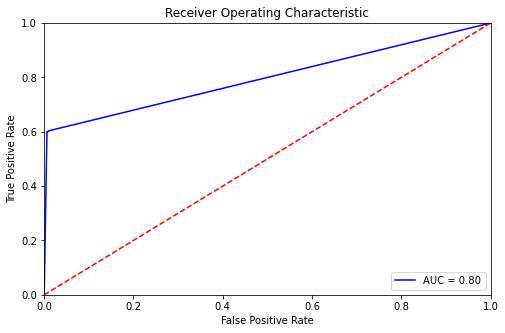

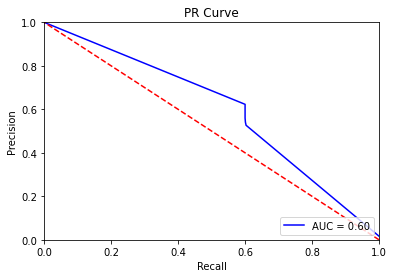

In [46]:
## LDA with Decision Tree Classifier 
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('dt', DecisionTreeClassifier(class_weight = 'balanced',random_state = 13 ))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

[0.60496614 0.5914787  0.62707838 0.59080963 0.53117783]

 Avg AUC score for PR curve:0.5891021357205736
Confusion matrix :
[[58481   519]
 [  366   634]]
Total_cost of mis- classification : 188190


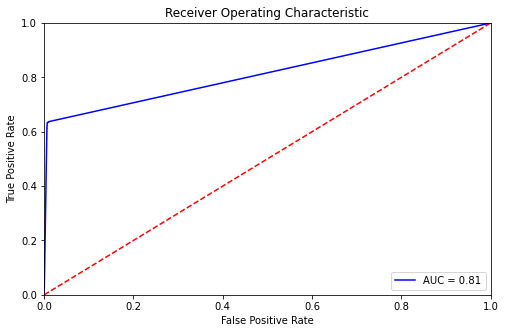

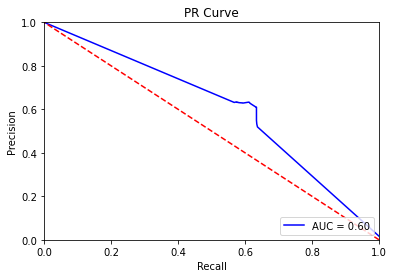

In [47]:
## LDA with Decision Tree Classifier 
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('dt', DecisionTreeClassifier(class_weight = 'balanced',random_state = 13 , max_depth = 25))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

[0.60340633 0.5959596  0.65425532 0.58093126 0.51485149]

 Avg AUC score for PR curve:0.5898807980298406
Confusion matrix :
[[58562   438]
 [  400   600]]
Total_cost of mis- classification : 204380


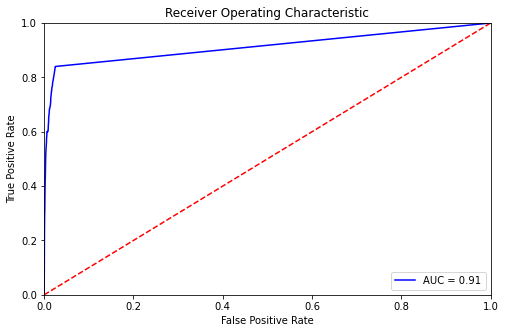

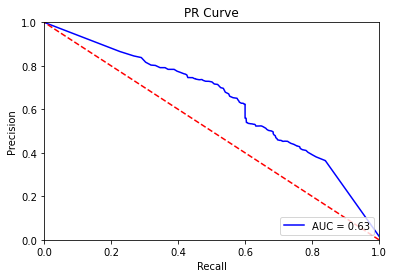

In [63]:
## LDA with Random Forest  Classifier 
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('rf', RandomForestClassifier(class_weight = 'balanced',random_state = 13 ))]
model = Pipeline(steps=steps)
##
n_features = cont_features
cross_validation(model=model, data= train_data_1 , n_features= n_features )

LDA + Logistic Regression givs the least mis-classification error. It shows a high Recall as the true positive are the highest. How ever it suffers from large false positives too , showing a poor Precision.

Check LDA on test data:


 X_train : (60000, 32)

 X_test : (16000, 32)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9732916666666667
Train Accuracy using predicted labels :0.9732916666666667
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.977
Confusion matrix with the predicted class  :
[[15294   331]
 [   40   335]]


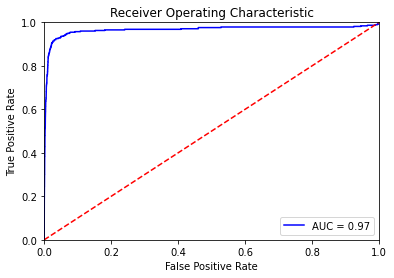

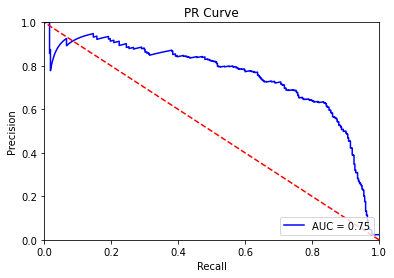

Total_cost of mis- classification : 23310


In [50]:
## Check the performance of the model on test data 
n_features = cont_features 
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression(class_weight = 'balanced', solver = 'liblinear'))]
model = Pipeline(steps=steps)
perform_classification(model , X_train, X_test, y_train, y_test , 'model')
